In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [45]:
def h(x,theta):
    return np.dot(theta.T,x)
def h_vectorised(X, theta):
    return (X @ theta)
def J(X,y, theta):
    m = X.shape[0]
    return 1/(2*m)*np.sum(np.square(h_vectorised(X,theta) - y))

def gradient(X,y,theta):
    m = X.shape[0]
    return (1/m)*(np.subtract(h_vectorised(X,theta),y).T @ X).reshape(-1,1)
def gradientmetod(X,y,learningrate = 0.1, iteration = 500):
    theta = np.zeros(X.shape[1]).reshape(-1,1)
    loss = np.empty(iteration)
    for it in range(iteration):
        loss[it] = J(X,y,theta)
        grad = gradient(X,y,theta)
        theta = theta - learningrate*(grad)
        if it % (iteration // 10) == (iteration // 10 - 1):
            print(f'Iteration {it + 1}\ngrad = {grad.squeeze()}\ntheta = {theta.squeeze()}\nloss = {loss[it]}')
    return theta, loss

def plotneki(loss, iteration):
    
    plt.plot(np.arange(iteration),loss)

In [37]:
podaci = pd.read_csv('./house.csv')
X = podaci['sqft_living']
y = podaci['price']
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.2)
X_train = X_train.to_numpy().reshape(-1,1)
y_train = y_train.to_numpy().reshape(-1,1)
X_test = X_test.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


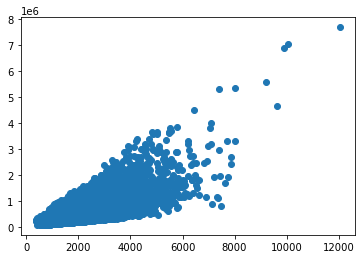

In [20]:
plt.scatter(X_train, y_train)


In [46]:
m = X_train.shape[0]
X_train_with_ones = np.concatenate((np.ones((m,1)),X_train),axis=1)
theta, loss = gradientmetod(X_train_with_ones, y_train,learningrate = 0.1, iteration = 500)

Iteration 50
grad = [-3091.12947921 -1469.44944967]
theta = [537019.66658033 255286.3795671 ]
loss = 33959340976.395294
Iteration 100
grad = [-15.93098647  -7.57321214]
theta = [539787.3452238  256602.06818088]
loss = 33953483950.39904
Iteration 150
grad = [-0.08210472 -0.03903063]
theta = [539801.60921737 256608.84894424]
loss = 33953483794.82823
Iteration 200
grad = [-0.00042315 -0.00020116]
theta = [539801.68273079 256608.88389077]
loss = 33953483794.824104
Iteration 250
grad = [-2.18069229e-06 -1.03670628e-06]
theta = [539801.68310966 256608.88407087]
loss = 33953483794.824097
Iteration 300
grad = [-1.12902798e-08 -5.36191870e-09]
theta = [539801.68311162 256608.8840718 ]
loss = 33953483794.824097
Iteration 350
grad = [-4.59143645e-10 -1.20226257e-10]
theta = [539801.68311162 256608.88407181]
loss = 33953483794.824097
Iteration 400
grad = [-4.59143645e-10 -1.20226257e-10]
theta = [539801.68311162 256608.88407181]
loss = 33953483794.824097
Iteration 450
grad = [-4.59143645e-10 -1.20

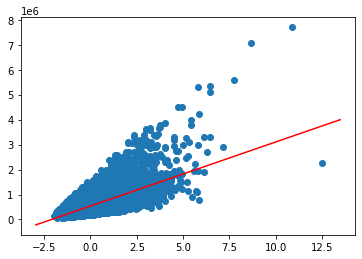

(500,)


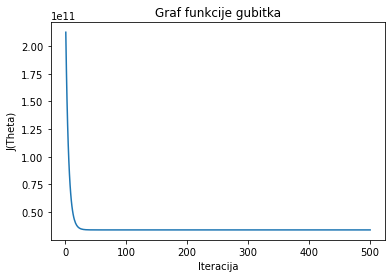

In [52]:
plt.scatter(X_train, y_train)
X = np.linspace(np.min(X_train)-1, np.max(X_train)+1, 10000)
y = theta[0] + theta[1]*X
plt.plot(X,y,color='red')
plt.show()
plt.plot(np.arange(1, loss.shape[0] + 1), loss)
plt.title('Graf funkcije gubitka')
plt.xlabel('Iteracija')
plt.ylabel('J(Theta)')
plt.show()

In [57]:
m = X_test.shape[0]
X_test_with_ones = np.concatenate((np.ones((m, 1)), X_test), axis=1)
predictions =X_test_with_ones @ theta

loss = 0
for i, prediction in enumerate(predictions):
    loss += (prediction -  y_test[i])**2
print(f'Prosječni loss na testnom skupu iznosi {loss[0] / (2 * m)}')

Prosječni loss na testnom skupu iznosi 35068210511.88732


In [67]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_test,y_test)
lr.intercept_,lr.coef_
#lr.score(X_test,y_test)


(array([542211.58781082]), array([[262510.38021133]]))

In [63]:
loss = 0
for i, prediction in enumerate(lr.predict(X_test)):
    loss = loss + (prediction - y_test[0])**2
print(loss[0]/(2*m))

36574602695.34421


In [65]:
m = X_train.shape[0]
X_neq = np.concatenate((np.ones((m, 1)), X_train), axis=1)
theta_normal_eq = np.linalg.inv(X_neq.T @ X_neq).dot(X_neq.T).dot(y_train)
theta_normal_eq.squeeze()

array([539801.68311163, 256608.88407181])

In [92]:
X = podaci[['sqft_living', 'bathrooms', 'bedrooms']]
y = podaci['price']
X_test,X_train,y_test,y_train = train_test_split(X,y,test_size=0.2)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [93]:
m = X_train.shape[0]
train_with_ones = np.concatenate((np.ones((m,1)),X_train),axis=1)
theta, loss = gradientmetod(train_with_ones,y_train, learningrate= 0.1, iteration=500)

Iteration 50
grad = [ -3053.03815265 -11462.1636825    6468.84518136   5839.89894832]
theta = [530402.08823953 207049.39416772  45272.7058655  -34942.91425565]
loss = 29851882457.02536
Iteration 100
grad = [  -15.73467234 -3126.02443078  2420.94168441   874.36376372]
theta = [533135.66137181 238446.02940114  24263.49857223 -47342.61858736]
loss = 29473654221.90361
Iteration 150
grad = [-8.10929642e-02 -9.05430569e+02  7.57745951e+02  1.91367138e+02]
theta = [533149.74959325 247273.72626675  17143.75502726 -49501.82401202]
loss = 29442645235.699738
Iteration 200
grad = [-4.17934885e-04 -2.66802093e+02  2.27869179e+02  5.13710303e+01]
theta = [533149.82220077 249853.39618254  14961.89098853 -50021.91374531]
loss = 29439929644.206192
Iteration 250
grad = [-2.15394790e-06 -7.89872889e+01  6.78266283e+01  1.48084122e+01]
theta = [533149.82257498 250615.39259652  14309.25782696 -50166.6275324 ]
loss = 29439690885.689575
Iteration 300
grad = [-1.09814414e-08 -2.34137626e+01  2.01344704e+01  4

In [100]:
# Podzadatak 4
m = X_test.shape[0]
X_test_with_ones = np.concatenate((np.ones((m, 1)), X_test), axis=1)
predictions = X_test_with_ones @ theta

loss = 0
for i, prediction in enumerate(predictions):
    loss += (prediction -  y_test[i])**2
print(f'Prosječni loss na testnom skupu iznosi {loss[0] / (2 * m)}')

Prosječni loss na testnom skupu iznosi 34433987698.10933


In [110]:
def cubic_regression_transform(X):
    """X je numpy.array oblika (m,)
    """
    m = X.shape[0]
    X_transformed = np.empty((m, 3))
    X_transformed[:, 0] = X
    X_transformed[:, 1] = np.power(X, 2)
    X_transformed[:, 2] = np.power(X, 3)
    return X_transformed

In [112]:
poda = pd.read_csv("poly_data.csv")
X = poda['x']
y = poda['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train_transformed = cubic_regression_transform(X_train.to_numpy())
X_test_transformed = cubic_regression_transform(X_test.to_numpy())
y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

# Skaliranje podataka
scaler = StandardScaler()
scaler.fit(X_train_transformed)
X_train_transformed = scaler.transform(X_train_transformed)
X_test_transformed = scaler.transform(X_test_transformed)
m = X_train.shape[0]
X_train_with_ones = np.concatenate((np.ones((m, 1)), X_train_transformed), axis=1)
theta, loss = gradientmetod(X_train_with_ones, y_train, learningrate=0.1, iteration=100000)

Iteration 10000
grad = [-1.15960574e-13 -1.24789896e-03  3.11295483e-03 -1.92826429e-03]
theta = [227.47401563 -32.65976735  81.28993805 167.4103317 ]
loss = 9144.013440463028
Iteration 20000
grad = [-1.13971055e-13 -3.74354673e-04  9.33848992e-04 -5.78456086e-04]
theta = [227.47401563 -31.93428368  79.48017785 168.53135535]
loss = 9144.007784404143
Iteration 30000
grad = [-1.16529009e-13 -1.12301897e-04  2.80143461e-04 -1.73529865e-04]
theta = [227.47401563 -31.71664731  78.93727156 168.86764896]
loss = 9144.007275399677
Iteration 40000
grad = [-1.12549969e-13 -3.36892179e-05  8.40396673e-05 -5.20568715e-05]
theta = [227.47401563 -31.65135902  78.77440621 168.96853299]
loss = 9144.007229592951
Iteration 50000
grad = [-1.15960574e-13 -1.01063600e-05  2.52108889e-05 -1.56164351e-05]
theta = [227.47401563 -31.63177332  78.72554856 168.99879699]
loss = 9144.007225470676
Iteration 60000
grad = [-1.16244792e-13 -3.03178640e-06  7.56296330e-06 -4.68474262e-06]
theta = [227.47401563 -31.62589

(1000, 4)


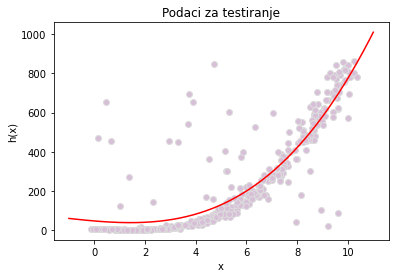

(array([[-31.62337993,  78.70461077, 169.01176653]]), array([227.47401563]))

In [115]:
plt.scatter(X_test, y_test, color='thistle', edgecolors='gainsboro')
x = np.linspace(-1.0, 11.0, 1000)
x_tr = scaler.transform(cubic_regression_transform(x))
x_tr = np.concatenate((np.ones((x_tr.shape[0], 1)), x_tr), axis=1)
print(x_tr.shape)
plt.plot(x, h_vectorised(x_tr, theta), color='red')
plt.title('Podaci za testiranje')
plt.xlabel('x')
plt.ylabel('h(x)')
plt.show()
lr = LinearRegression().fit(X_train_transformed, y_train)
lr.coef_, lr.intercept_

In [116]:
lr.score(X_test_transformed, y_test)

0.7880730450667341